1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [2]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('data/2023_6/open_rank_20236.csv')

# 筛选出美国的项目并且取排名前一百的数据
us_data = df[ df['rank'] <= 100]

# 计算 value 的最大值、最小值、均值和中位数
max_value = us_data['value'].max()
min_value = us_data['value'].min()
mean_value = us_data['value'].mean()
median_value = us_data['value'].median()

print(f"美国排名前一百的项目的 value 的最大值为：{max_value}")
print(f"美国排名前一百的项目的 value 的最小值为：{min_value}")
print(f"美国排名前一百的项目的 value 的均值为：{mean_value}")
print(f"美国排名前一百的项目的 value 的中位数为：{median_value}")

美国排名前一百的项目的 value 的最大值为：1394.45
美国排名前一百的项目的 value 的最小值为：200.68
美国排名前一百的项目的 value 的均值为：346.9679
美国排名前一百的项目的 value 的中位数为：273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [47]:
import numpy as np
# 读取 CSV 文件
top_ten_us = pd.read_csv('data/2022/activity_2022.csv')
# 计算增长率
col = top_ten_us.shape[1]-1
row = top_ten_us.shape[0]
rate=np.array([0 for i in range(row)])
for i in range(1,col):
    rate=rate+(top_ten_us.iloc[:,i+1]-top_ten_us.iloc[:,i])/top_ten_us.iloc[:,i]
    #print(rate[0])
#计算平均增长率
rate=round(rate/(col-1),6)
rate

0   -0.017928
1    0.000295
2   -0.022848
3   -0.003651
4    0.140824
5   -0.012404
6    0.008453
7    0.022905
8    0.013160
9   -0.003778
dtype: float64

3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [50]:
data1 = pd.read_csv('data/2022/china_2022.csv')
data2 = pd.read_csv('data/2022/global_2022.csv')
# 计算基本统计量
china_stats = data1.describe()
global_stats = data2.describe()

print("中国开源前十企业的统计指标：\n", china_stats, "\n")
print("全球开源前十企业的统计指标：\n", global_stats, "\n")


中国开源前十企业的统计指标：
        issue_comment    open_issue     open_pull  review_comment  \
count      10.000000     10.000000     10.000000        10.00000   
mean    61205.500000   9169.200000  16912.700000     19857.50000   
std     49332.487917   6810.653563  10068.922805     21115.07349   
min     11741.000000    752.000000   1823.000000      2113.00000   
25%     30943.500000   4625.250000   9376.750000      3120.00000   
50%     39141.000000   6889.500000  15953.000000     10851.00000   
75%     82179.500000  14225.500000  22483.250000     31507.75000   
max    167814.000000  22397.000000  35266.000000     60402.00000   

        merged_pull      rank         value  rankDelta    valueDelta  
count     10.000000  10.00000      10.00000  10.000000     10.000000  
mean   13764.100000   5.50000   40269.53400   5.300000   9265.007000  
std     7692.752064   3.02765   30905.17181   9.944848   5327.824003  
min     1165.000000   1.00000   12033.71000   0.000000   2329.360000  
25%     8067.250

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [51]:
# 已知数据
P_A = 0.25                # 非软件型项目的先验概率
P_software = 0.75         # 软件型项目的先验概率
P_B_given_A = 0.85        # 非软件型项目带有 HTML/Markdown 标签的概率
P_B_given_software = 0.10 # 软件型项目带有 HTML/Markdown 标签的概率

# 计算 P(B)
P_B = (P_B_given_A * P_A) + (P_B_given_software * P_software)

# 计算 P(A | B)
P_A_given_B = (P_B_given_A * P_A) / P_B

print("已知一个项目带有 HTML/Markdown 标签，该项目是非软件型项目的概率为：", P_A_given_B)


已知一个项目带有 HTML/Markdown 标签，该项目是非软件型项目的概率为： 0.7391304347826088


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [52]:
# 已知数据
P_C = 0.50                   # 工具组件型项目的先验概率
P_non_tool = 0.50            # 非工具组件型项目的先验概率
P_D_given_C = 0.35           # 工具组件型项目中使用 JavaScript 的概率
P_D_given_non_tool = 0.10    # 非工具组件型项目中使用 JavaScript 的概率

# 计算 P(D)
P_D = (P_D_given_C * P_C) + (P_D_given_non_tool * P_non_tool)

# 计算 P(C | D)
P_C_given_D = (P_D_given_C * P_C) / P_D

print("已知一个项目是由 JavaScript 语言编写的，该项目是工具组件型项目的概率为：", P_C_given_D)


已知一个项目是由 JavaScript 语言编写的，该项目是工具组件型项目的概率为： 0.7777777777777778


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

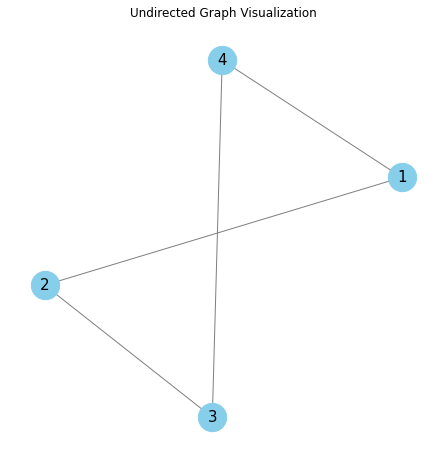

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义节点和边
user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 创建无向图
G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)

# 绘制无向图
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, font_size=15, font_color='black', edge_color='gray')
plt.title("Undirected Graph Visualization")
plt.show()


7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

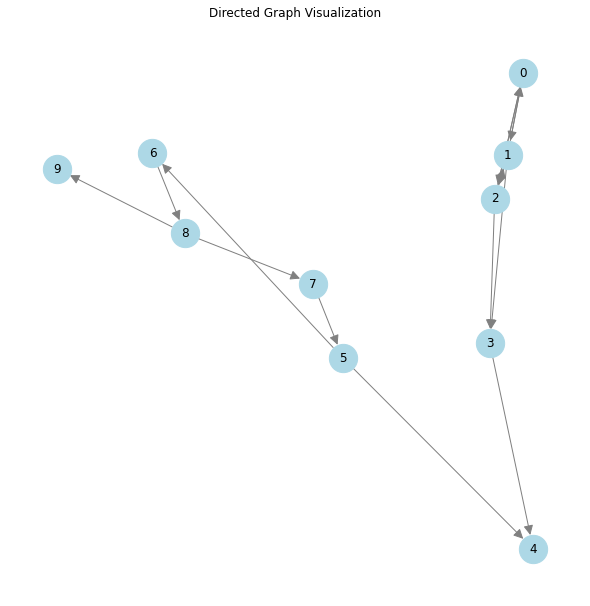

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义节点和有向边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

# 创建有向图
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

# 绘制有向图
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # 布局算法，增强图的可读性
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=12, font_color='black', edge_color='gray', arrowsize=20)
plt.title("Directed Graph Visualization")
plt.show()


8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

PageRank 值：
节点 0: 0.0950
节点 1: 0.1055
节点 2: 0.1055
节点 3: 0.0950
节点 4: 0.1593
节点 5: 0.1020
节点 6: 0.0786
节点 7: 0.0786
节点 8: 0.1020
节点 9: 0.0786


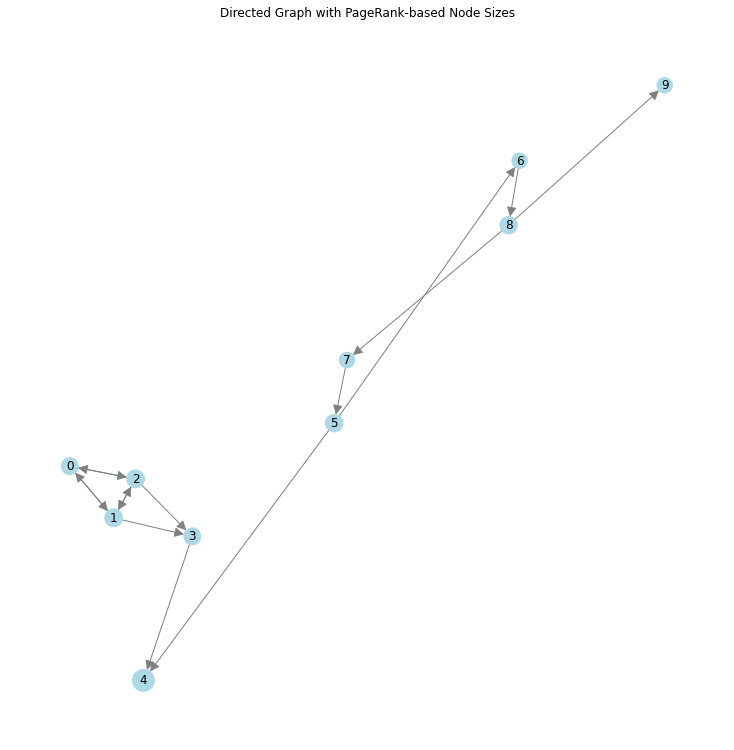

In [55]:
# 计算 PageRank 值
pagerank_values = nx.pagerank(G)
print("PageRank 值：")
for node, value in pagerank_values.items():
    print(f"节点 {node}: {value:.4f}")

# 根据 PageRank 调整节点大小
node_sizes = [pagerank_values[node] * 3000 for node in G.nodes]  # 调整比例以增强可视化效果

# 绘制有向图，节点大小按 PageRank 值比例
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_sizes, 
        font_size=12, font_color='black', edge_color='gray', arrowsize=20)
plt.title("Directed Graph with PageRank-based Node Sizes")
plt.show()